## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/ABK_AIML/CNN/DogBreedProject/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
import numpy as np

In [0]:
labels = pd.read_csv('labels.csv')

In [0]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
DogCatCount = labels['breed'].value_counts()

In [0]:
DogCatCount

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [0]:
DogCatCount.shape

(120,)

### Get one-hot encodings of labels

In [0]:
breeds = pd.Series(labels['breed'])

In [0]:
one_hot_enc = pd.get_dummies(breeds, sparse=True)
oneHotLabels = np.asarray(one_hot_enc)

In [0]:
oneHotLabels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [0]:
one_hot_enc.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
oneHotLabels.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

In [0]:
x_train = []
y_train = []
img_rows = 128
img_cols = 128
num_channel = 1

In [0]:
for idd, lbl in tqdm(labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(idd), 1)
  train_img_resize = cv2.resize(train_img, (img_rows, img_cols))
  x_train.append(train_img_resize)
  y_train.append(lbl)

100%|██████████| 10222/10222 [00:32<00:00, 315.32it/s]


In [0]:
y_train[5]

'bedlington_terrier'

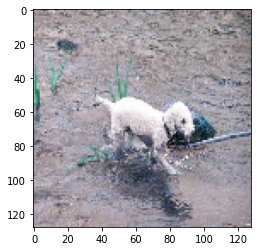

In [0]:
plt.imshow(x_train[5])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train_arr = np.array(x_train)
x_train_arr.shape

(10222, 128, 128, 3)

In [0]:
x_train_arr = x_train_arr.astype('float32')
x_train_norm = x_train_arr/255 

In [0]:
x_train_norm.shape

(10222, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train_norm, oneHotLabels, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))

8177
2045


In [0]:
print (len(y_train2))
print (len(y_val))

8177
2045


In [0]:
print(x_train2.shape)
print(x_val.shape)
print(y_train2.shape)
print(y_val.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)
(8177, 120)
(2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample_sub = pd.read_csv('sample_submission.csv')

In [0]:
sample_sub.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_img = sample_sub['id']

In [0]:
test_img.shape

(10357,)

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
for f in tqdm(test_img.values):
  img = cv2.imread('./test/{}.jpg'.format(f), 0)
  img_resize = cv2.resize(img, (img_rows, img_cols)) 
  x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:15<00:00, 671.27it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_arr = np.array(x_test_feature)
x_test_arr.shape

(10357, 128, 128)

In [0]:
x_test_arr = x_test_arr.astype('float32')
x_test_norm = x_test_arr/255

In [0]:
x_test_norm.shape

(10357, 128, 128)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from __future__ import absolute_import, division, print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
import seaborn as sns

In [0]:
model2 = Sequential()

model2.add(Convolution2D(32, kernel_size=(5, 5), input_shape=(128, 128, 3)))
model2.add(Activation('relu'))

model2.add(Convolution2D(62, kernel_size=(3, 3)))
model2.add(Activation('relu'))

model2.add(Flatten())

model2.add(Dense(256))
model2.add(Activation('relu'))

model2.add(Dense(120))
model2.add(Activation('softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
batch_size = 128 
epochs = 10

In [0]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model2.fit(x_train2, y_train2, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=callback_list)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 446s 55ms/step - loss: 6.5613 - accuracy: 0.0103 - val_loss: 4.7807 - val_accuracy: 0.0093
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


8177/8177 [==============================] - 442s 54ms/step - loss: 4.6592 - accuracy: 0.0375 - val_loss: 4.8056 - val_accuracy: 0.0240
Epoch 3/10
8177/8177 [==============================] - 439s 54ms/step - loss: 3.3192 - accuracy: 0.2801 - val_loss: 5.4824 - val_accuracy: 0.0249
Epoch 4/10
8177/8177 [==============================] - 442s 54ms/step - loss: 0.8865 - accuracy: 0.8146 - val_loss: 8.1371 - val_accuracy: 0.0274
Epoch 5/10
8177/8177 [==============================] - 441s 54ms/step - loss: 0.1436 - accuracy: 0.9801 - val_loss: 9.1273 - val_accuracy: 0.0308
Epoch 6/10
8177/8177 [==============================] - 440s 54ms/step - loss: 0.0690 - accuracy: 0.9932 - val_loss: 10.5288 - val_accuracy: 0.0298
Epoch 7/10
8177/8177 [==============================] - 451s 55ms/step - loss: 0.0255 - accuracy: 0.9974 - val_loss: 9.7654 - val_accuracy: 0.0308
Epoch 8/10
8177/8177 [==============================] - 450s 55ms/step - loss: 0.0402 - accuracy: 0.9973 - val_loss: 10.3351 - v

In [0]:
loss_and_metrics = model2.evaluate(x_train2, y_train2)
print(loss_and_metrics)

8177/8177 [==============================] - 97s 12ms/step
[0.007354571166303876, 0.9993885159492493]


In [0]:
loss_and_metrics = model2.evaluate(x_val, y_val)
print(loss_and_metrics)

2045/2045 [==============================] - 24s 12ms/step
[10.32109554495963, 0.027872860431671143]


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
model3 = Sequential()

model3.add(Convolution2D(32, kernel_size=(5, 5), input_shape=(128, 128, 3)))
model3.add(Activation('relu'))

model3.add(Convolution2D(62, kernel_size=(3, 3)))
model3.add(Activation('relu'))

model3.add(Flatten())

model3.add(Dense(256))
model3.add(Activation('relu'))

model3.add(Dense(120))
model3.add(Activation('softmax'))

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_generator = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=50,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=False,  
    vertical_flip=False) 

train_generator.fit(x_train2)

In [0]:
val_generator = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=50,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=False,  
    vertical_flip=False) 

val_generator.fit(x_val)

[]

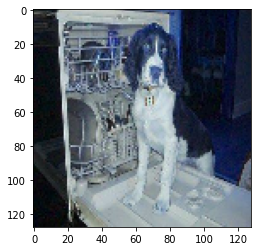

In [0]:
plt.imshow(x_train2[0].squeeze(), cmap='gray')
plt.plot()

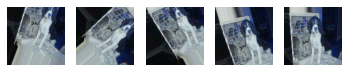

In [0]:
gen = train_generator.flow(x_train2[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model3
model3.fit_generator(train_generator.flow(x_train2, y_train2,batch_size=batch_size),
                    samples_per_epoch=x_train2.shape[0],
                    nb_epoch=epochs,
                    validation_data=(x_val, y_val), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=63, epochs=10)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
63/63 [==============================] - 408s 6s/step - loss: 7.7611 - accuracy: 0.0099 - val_loss: 4.7871 - val_accuracy: 0.0117
Epoch 2/10
63/63 [==============================] - 403s 6s/step - loss: 4.7856 - accuracy: 0.0103 - val_loss: 4.7866 - val_accuracy: 0.0122
Epoch 3/10
63/63 [==============================] - 405s 6s/step - loss: 4.7771 - accuracy: 0.0165 - val_loss: 4.7757 - val_accuracy: 0.0098
Epoch 4/10
63/63 [==============================] - 406s 6s/step - loss: 4.7453 - accuracy: 0.0176 - val_loss: 4.7244 - val_accuracy: 0.0161
Epoch 5/10
63/63 [==============================] - 432s 7s/step - loss: 4.7004 - accuracy: 0.0209 - val_loss: 4.6813 - val_accuracy: 0.0181
Epoch 6/10
63/63 [==============================] - 429s 7s/step - loss: 4.6932 - accuracy: 0.0206 - val_loss: 4.7724 - val_accuracy: 0.0127
Epoch 7/10
63/63 [==============================] - 407s 6s/step - loss: 4.7517 - accuracy: 0.0169 - val_loss: 4.7393 - val_accuracy: 0.0166
Epoch 8/10
63

In [0]:
loss_and_metrics = model3.evaluate(x_train2, y_train2)
print(loss_and_metrics)

8177/8177 [==============================] - 90s 11ms/step
[4.552337154602092, 0.026782438158988953]


In [0]:
loss_and_metrics = model3.evaluate(x_val, y_val)
print(loss_and_metrics)

2045/2045 [==============================] - 23s 11ms/step
[4.62686561220724, 0.02200488932430744]


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights= (project_path+'vgg16_weights.h5'),
                 include_top=False, input_shape = (128, 128, 3))
# , pooling='avg')

Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras import applications
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

In [0]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(120, activation="softmax")(x)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers[:19]:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
batch_size = 128
epochs = 10

In [0]:
model_final = Model(input = base_model.input, output = predictions)

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_final.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics=["accuracy"])

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

# Train the model 
model_final.fit(x_train2, y_train2, batch_size=batch_size, epochs = epochs, validation_data=(x_val, y_val), callbacks = [early])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 543s 66ms/step - loss: 4.7887 - accuracy: 0.0124 - val_loss: 4.7425 - val_accuracy: 0.0161
Epoch 2/10
8177/8177 [==============================] - 544s 67ms/step - loss: 4.6499 - accuracy: 0.0350 - val_loss: 4.5477 - val_accuracy: 0.0557
Epoch 3/10
8177/8177 [==============================] - 542s 66ms/step - loss: 4.2786 - accuracy: 0.0769 - val_loss: 4.1285 - val_accuracy: 0.0954
Epoch 4/10
8177/8177 [==============================] - 543s 66ms/step - loss: 3.7984 - accuracy: 0.1332 - val_loss: 3.8146 - val_accuracy: 0.1262
Epoch 5/10
8177/8177 [==============================] - 540s 66ms/step - loss: 3.4189 - accuracy: 0.1800 - val_loss: 3.5948 - val_accuracy: 0.1511
Epoch 6/10
8177/8177 [==============================] - 552s 67ms/step - loss: 3.1631 - accuracy: 0.2278 - val_loss: 3.8389 - val_accuracy: 0.1413
Epoch 7/10
8177/8177 [==============================] - 555s 68ms/step

In [0]:
loss_and_metrics = model_final.evaluate(x_train2, y_train2)
print(loss_and_metrics)

8177/8177 [==============================] - 442s 54ms/step
[2.1930398606315165, 0.42546164989471436]


In [0]:
loss_and_metrics = model_final.evaluate(x_val, y_val)
print(loss_and_metrics)

2045/2045 [==============================] - 110s 54ms/step
[3.4350705883613717, 0.18973104655742645]
